In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [5]:
# 서울 매출 100대 상권 기반으로 8개의 핫플레이스를 선정하였다.
# https://news.sktelecom.com/173585
# https://map.seoul.go.kr/spm/map/new_map.do

In [6]:
# 핫플레이스에 속한 행정동코드
# 1.신사역(가로수길)-압구정로데오역 : '압구정동','신사1동','신사2동','청담동'
sinsa = [11680545,11380631,11380631,11380632,11680565]

# 2.강남역-교대역 : '역삼1동','역삼2동','서초1동','서초2동','서초3동','서초4동'
gangnam = [11680640,11680650,11650510,11650520,11650530,11650531]

# 3.천호역 : '천호1동','천호2동','천호3동','성내2동','풍납1동'
cheonho = [11740600,11740610,11740620,11740650,11710510]

# 4.종각역-명동 : '종로1.2.3.4가동','명동'
jonggak = [11110615,11140550]

# 5.서울대입구역-낙성대역 : '청룡동','행운동','중앙동','낙성대동','인현동'
snuenter = [11620595,11620575,11620615,11620585,11620625]

# 6.노원역 : '상계2동','상계6,7동','상계10동'
noone = [11350640,11350695,11350720]

# 7.성수역-뚝섬역 : '성수1가제1동','성수1가제2동','성수2가제1동','성수2가제2동','화양동'
seongsu = [11200650,11200660,11200670,11200690,11215710]

# 8.홍대역-신촌역 : '서교동','신촌동','연희동'
hongdae = [11440660,11410585,11410615]

hotplace = sinsa+gangnam+cheonho+jonggak+snuenter+noone+seongsu+hongdae
hotplace_dict = dict(sinsa = [11680545,11380631,11380631,11380632,11680565],gangnam = [11680640,11680650,11650510,11650520,11650530,11650531],
cheonho = [11740600,11740610,11740620,11740650,11710510],jonggak = [11110615,11140550],snuenter = [11620595,11620575,11620615,11620585,11620625],
noone = [11350640,11350695,11350720],seongsu = [11200650,11200660,11200670,11200690,11215710],hongdae = [11440660,11410585,11410615])
print(len(hotplace))
print(hotplace_dict)

34
{'sinsa': [11680545, 11380631, 11380631, 11380632, 11680565], 'gangnam': [11680640, 11680650, 11650510, 11650520, 11650530, 11650531], 'cheonho': [11740600, 11740610, 11740620, 11740650, 11710510], 'jonggak': [11110615, 11140550], 'snuenter': [11620595, 11620575, 11620615, 11620585, 11620625], 'noone': [11350640, 11350695, 11350720], 'seongsu': [11200650, 11200660, 11200670, 11200690, 11215710], 'hongdae': [11440660, 11410585, 11410615]}


# 8월

In [7]:
file_list = os.listdir('/Users/minkyuramen/Desktop/INNER_PEOPLE_202208/')
print(file_list)
name_list = []

for file in sorted(file_list):
    file_name = file.split('.')[0]
    move_data = pd.read_csv(f'/Users/minkyuramen/Desktop/INNER_PEOPLE_202208/{file}', encoding='euc-kr')
    move_data5 = move_data.iloc[:,:5]
    for idx, i in enumerate(hotplace):
        globals()[f'{file_name}_{idx}'] = move_data5[move_data5['행정동코드']==i]
    globals()[file_name] = pd.concat([globals()[f'{file_name}_{idx}'] for idx in range(len(hotplace))])
    name_list.append(globals()[file_name])

['INNER_PEOPLE_20220818.csv', 'INNER_PEOPLE_20220824.csv', 'INNER_PEOPLE_20220830.csv', 'INNER_PEOPLE_20220831.csv', 'INNER_PEOPLE_20220825.csv', 'INNER_PEOPLE_20220819.csv', 'INNER_PEOPLE_20220827.csv', 'INNER_PEOPLE_20220826.csv', 'INNER_PEOPLE_20220822.csv', 'INNER_PEOPLE_20220823.csv', 'INNER_PEOPLE_20220821.csv', 'INNER_PEOPLE_20220809.csv', 'INNER_PEOPLE_20220808.csv', 'INNER_PEOPLE_20220820.csv', 'INNER_PEOPLE_20220805.csv', 'INNER_PEOPLE_20220811.csv', 'INNER_PEOPLE_20220810.csv', 'INNER_PEOPLE_20220804.csv', 'INNER_PEOPLE_20220812.csv', 'INNER_PEOPLE_20220806.csv', 'INNER_PEOPLE_20220807.csv', 'INNER_PEOPLE_20220813.csv', 'INNER_PEOPLE_20220817.csv', 'INNER_PEOPLE_20220803.csv', 'INNER_PEOPLE_20220802.csv', 'INNER_PEOPLE_20220816.csv', 'INNER_PEOPLE_20220814.csv', 'INNER_PEOPLE_20220828.csv', 'INNER_PEOPLE_20220829.csv', 'INNER_PEOPLE_20220815.csv', 'INNER_PEOPLE_20220801.csv']


In [8]:
move_people_08 = pd.concat(name_list)
move_people_08

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
8612,20220801,0,11680545,11110,30
8613,20220801,0,11680545,11140,50
8614,20220801,0,11680545,11170,174
8615,20220801,0,11680545,11200,556
8616,20220801,0,11680545,11215,127
...,...,...,...,...,...
244534,20220831,23,11410615,11620,69
244535,20220831,23,11410615,11650,44
244536,20220831,23,11410615,11680,77
244537,20220831,23,11410615,11710,48


In [9]:
for time in [23,0,1,2,3,4]:
    globals()[f'move_people_08{time}'] = move_people_08[move_people_08['시간대구분']==time]
move_people_08_night = pd.concat([globals()[f'move_people_08{time}'] for time in [23,0,1,2,3,4]])
move_people_08_night

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
247546,20220801,23,11680545,11110,47
247547,20220801,23,11680545,11140,82
247548,20220801,23,11680545,11170,198
247549,20220801,23,11680545,11200,720
247550,20220801,23,11680545,11215,184
...,...,...,...,...,...
45287,20220831,4,11410615,11620,45
45288,20220831,4,11410615,11650,41
45289,20220831,4,11410615,11680,76
45290,20220831,4,11410615,11710,27


# 7월

In [10]:
file_list = os.listdir('/Users/minkyuramen/Desktop/INNER_PEOPLE_202207/')
print(file_list)
name_list = []

for file in sorted(file_list):
    file_name = file.split('.')[0]
    move_data = pd.read_csv(f'/Users/minkyuramen/Desktop/INNER_PEOPLE_202207/{file}', encoding='euc-kr')
    move_data5 = move_data.iloc[:,:5]
    for idx, i in enumerate(hotplace):
        globals()[f'{file_name}_{idx}'] = move_data5[move_data5['행정동코드']==i]
    globals()[file_name] = pd.concat([globals()[f'{file_name}_{idx}'] for idx in range(len(hotplace))])
    name_list.append(globals()[file_name])

['INNER_PEOPLE_20220714.csv', 'INNER_PEOPLE_20220728.csv', 'INNER_PEOPLE_20220729.csv', 'INNER_PEOPLE_20220701.csv', 'INNER_PEOPLE_20220715.csv', 'INNER_PEOPLE_20220703.csv', 'INNER_PEOPLE_20220717.csv', 'INNER_PEOPLE_20220716.csv', 'INNER_PEOPLE_20220702.csv', 'INNER_PEOPLE_20220706.csv', 'INNER_PEOPLE_20220712.csv', 'INNER_PEOPLE_20220713.csv', 'INNER_PEOPLE_20220707.csv', 'INNER_PEOPLE_20220711.csv', 'INNER_PEOPLE_20220705.csv', 'INNER_PEOPLE_20220704.csv', 'INNER_PEOPLE_20220710.csv', 'INNER_PEOPLE_20220721.csv', 'INNER_PEOPLE_20220709.csv', 'INNER_PEOPLE_20220708.csv', 'INNER_PEOPLE_20220720.csv', 'INNER_PEOPLE_20220722.csv', 'INNER_PEOPLE_20220723.csv', 'INNER_PEOPLE_20220727.csv', 'INNER_PEOPLE_20220726.csv', 'INNER_PEOPLE_20220718.csv', 'INNER_PEOPLE_20220730.csv', 'INNER_PEOPLE_20220724.csv', 'INNER_PEOPLE_20220725.csv', 'INNER_PEOPLE_20220731.csv', 'INNER_PEOPLE_20220719.csv']


In [11]:
move_people_07 = pd.concat(name_list)
move_people_07

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
8438,20220701,0,11680545,11110,44
8439,20220701,0,11680545,11140,63
8440,20220701,0,11680545,11170,169
8441,20220701,0,11680545,11200,654
8442,20220701,0,11680545,11215,136
...,...,...,...,...,...
246290,20220731,23,11410615,11620,41
246291,20220731,23,11410615,11650,43
246292,20220731,23,11410615,11680,58
246293,20220731,23,11410615,11710,31


In [12]:
for time in [23,0,1,2,3,4]:
    globals()[f'move_people_07{time}'] = move_people_07[move_people_07['시간대구분']==time]
move_people_07_night = pd.concat([globals()[f'move_people_07{time}'] for time in [23,0,1,2,3,4]])
move_people_07_night

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
246831,20220701,23,11680545,11110,98
246832,20220701,23,11680545,11140,143
246833,20220701,23,11680545,11170,441
246834,20220701,23,11680545,11200,981
246835,20220701,23,11680545,11215,414
...,...,...,...,...,...
46577,20220731,4,11410615,11620,51
46578,20220731,4,11410615,11650,41
46579,20220731,4,11410615,11680,79
46580,20220731,4,11410615,11710,54


# 6월

In [13]:
file_list = os.listdir('/Users/minkyuramen/Desktop/INNER_PEOPLE_202206/')
print(file_list)
name_list = []

for file in sorted(file_list):
    file_name = file.split('.')[0]
    move_data = pd.read_csv(f'/Users/minkyuramen/Desktop/INNER_PEOPLE_202206/{file}', encoding='euc-kr')
    move_data5 = move_data.iloc[:,:5]
    for idx, i in enumerate(hotplace):
        globals()[f'{file_name}_{idx}'] = move_data5[move_data5['행정동코드']==i]
    globals()[file_name] = pd.concat([globals()[f'{file_name}_{idx}'] for idx in range(len(hotplace))])
    name_list.append(globals()[file_name])

['INNER_PEOPLE_20220603.csv', 'INNER_PEOPLE_20220617.csv', 'INNER_PEOPLE_20220616.csv', 'INNER_PEOPLE_20220602.csv', 'INNER_PEOPLE_20220614.csv', 'INNER_PEOPLE_20220628.csv', 'INNER_PEOPLE_20220629.csv', 'INNER_PEOPLE_20220601.csv', 'INNER_PEOPLE_20220615.csv', 'INNER_PEOPLE_20220611.csv', 'INNER_PEOPLE_20220605.csv', 'INNER_PEOPLE_20220604.csv', 'INNER_PEOPLE_20220610.csv', 'INNER_PEOPLE_20220606.csv', 'INNER_PEOPLE_20220612.csv', 'INNER_PEOPLE_20220613.csv', 'INNER_PEOPLE_20220607.csv', 'INNER_PEOPLE_20220622.csv', 'INNER_PEOPLE_20220623.csv', 'INNER_PEOPLE_20220621.csv', 'INNER_PEOPLE_20220609.csv', 'INNER_PEOPLE_20220608.csv', 'INNER_PEOPLE_20220620.csv', 'INNER_PEOPLE_20220618.csv', 'INNER_PEOPLE_20220630.csv', 'INNER_PEOPLE_20220624.csv', 'INNER_PEOPLE_20220625.csv', 'INNER_PEOPLE_20220619.csv', 'INNER_PEOPLE_20220627.csv', 'INNER_PEOPLE_20220626.csv']


In [14]:
move_people_06 = pd.concat(name_list)
move_people_06

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
8721,20220601,0,11680545,11110,70
8722,20220601,0,11680545,11140,116
8723,20220601,0,11680545,11170,259
8724,20220601,0,11680545,11200,851
8725,20220601,0,11680545,11215,278
...,...,...,...,...,...
244007,20220630,23,11410615,11620,50
244008,20220630,23,11410615,11650,33
244009,20220630,23,11410615,11680,40
244010,20220630,23,11410615,11710,32


In [15]:
for time in [23,0,1,2,3,4]:
    globals()[f'move_people_06{time}'] = move_people_06[move_people_06['시간대구분']==time]
move_people_06_night = pd.concat([globals()[f'move_people_06{time}'] for time in [23,0,1,2,3,4]])
move_people_06_night

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
248176,20220601,23,11680545,11110,56
248177,20220601,23,11680545,11140,58
248178,20220601,23,11680545,11170,137
248179,20220601,23,11680545,11200,708
248180,20220601,23,11680545,11215,202
...,...,...,...,...,...
45179,20220630,4,11410615,11620,43
45180,20220630,4,11410615,11650,29
45181,20220630,4,11410615,11680,59
45182,20220630,4,11410615,11710,40


# 각 hotplace

In [16]:
move_people_night = pd.concat([move_people_06_night,move_people_07_night,move_people_08_night])
move_people_night

,"?""기준일ID""",시간대구분,행정동코드,거주지 자치구 코드,총생활인구수
248176,20220601,23,11680545,11110,56
248177,20220601,23,11680545,11140,58
248178,20220601,23,11680545,11170,137
248179,20220601,23,11680545,11200,708
248180,20220601,23,11680545,11215,202
...,...,...,...,...,...
45287,20220831,4,11410615,11620,45
45288,20220831,4,11410615,11650,41
45289,20220831,4,11410615,11680,76
45290,20220831,4,11410615,11710,27


In [17]:
for location in hotplace_dict:
    for num in hotplace_dict[location]:
        globals()[f'{location}_{num}'] = move_people_night[move_people_night['행정동코드']==num]
    globals()[f'{location}_moving_data_night'] = pd.concat([globals()[f'{location}_{idx}'] for idx in hotplace_dict[location]])
    globals()[f'{location}_moving_data_night'][['?"기준일ID"','시간대구분']] = globals()[f'{location}_moving_data_night'][['?"기준일ID"','시간대구분']].astype('str')
    globals()[f'{location}_moving_data_night']['시간대구분'] = globals()[f'{location}_moving_data_night']['시간대구분'].str.zfill(2)
    globals()[f'{location}_moving_data_night']['시간'] = globals()[f'{location}_moving_data_night']['?"기준일ID"'] + globals()[f'{location}_moving_data_night']['시간대구분']
    globals()[f'{location}_potential_customer'] = globals()[f'{location}_moving_data_night'].groupby('시간')['총생활인구수'].sum()

# 시계열예측

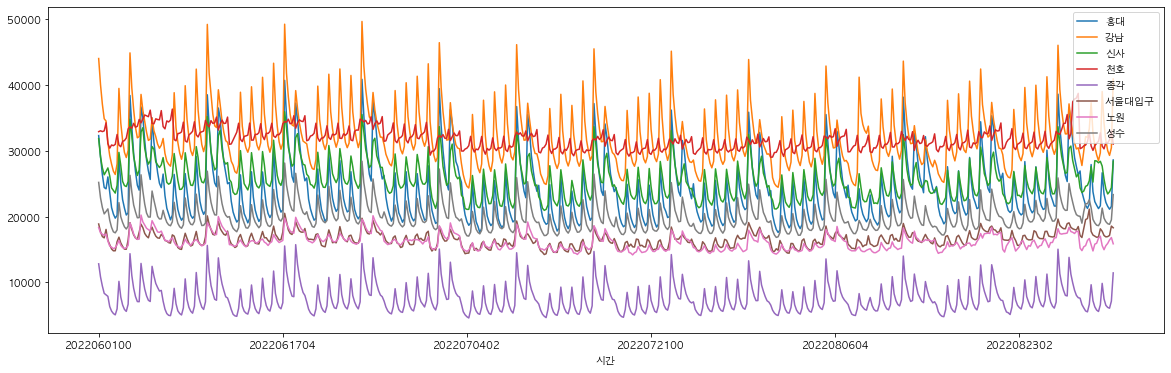

In [18]:
plt.rc('font',family='AppleGothic')
plt.figure(figsize=(20,6))
hongdae_potential_customer.plot(label='홍대')
gangnam_potential_customer.plot(label='강남')
sinsa_potential_customer.plot(label='신사')
cheonho_potential_customer.plot(label='천호')
jonggak_potential_customer.plot(label='종각')
snuenter_potential_customer.plot(label='서울대입구')
noone_potential_customer.plot(label='노원')
seongsu_potential_customer.plot(label='성수')
plt.legend()

In [19]:
# 운행이 끝난 MOD는 가장 가까운 핫플로 이동
# 각 핫플에 필요한 MOD수는 예측한 잠재고객인원에 비례하여 배정
# 첫번째 핫플에 필요한 MOD수가 다 배정되면 > 두번째로 가까운 핫플로 이동

In [20]:
hongdae_potential_customer

시간
2022060100    32286
2022060101    29091
2022060102    26373
2022060103    24408
2022060104    24206
              ...  
2022083101    22160
2022083102    21547
2022083103    21115
2022083104    21536
2022083123    28588
Name: 총생활인구수, Length: 552, dtype: int64

In [21]:
train_ts = hongdae_potential_customer[:-6*14]
test_ts = hongdae_potential_customer[-6*14:]

In [22]:
train_ts

시간
2022060100    32286
2022060101    29091
2022060102    26373
2022060103    24408
2022060104    24206
              ...  
2022081701    22128
2022081702    20947
2022081703    20435
2022081704    20683
2022081723    26948
Name: 총생활인구수, Length: 468, dtype: int64

In [27]:
potential_customer_DB = {
    '홍대':hongdae_potential_customer,
    '강남':gangnam_potential_customer,
    '신사':sinsa_potential_customer,
    '천호':cheonho_potential_customer,
    '종가':jonggak_potential_customer,
    '서울대입구':snuenter_potential_customer,
    '노원':noone_potential_customer,
    '성수':seongsu_potential_customer
}

In [28]:
import pickle

with open('potential_customer.pickle', 'wb') as f:
    pickle.dump(potential_customer_DB, f)